# 常用的 DataFrame 操作
* merge / transform
* subset
* groupby

# [作業目標]
- 練習填入對應的欄位資料或公式, 完成題目的要求 

# [作業重點]
- 填入適當的輸入資料, 讓後面的程式顯示題目要求的結果 (Hint: 填入對應區間或欄位即可, In[4]~In[6], Out[4]~In[6])
- 填入z轉換的計算方式, 完成轉換後的數值 (Hint: 參照標準化公式, In[7])

In [49]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [50]:
# 設定 data_path
dir_data = '/home/osboxes/Documents/Day_013_HW/'

In [51]:
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: /home/osboxes/Documents/Day_013_HW/application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## 作業
1. 請將 app_train 中的 CNT_CHILDREN 依照下列規則分為四組，並將其結果在原本的 dataframe 命名為 CNT_CHILDREN_GROUP
    * 0 個小孩
    * 有 1 - 2 個小孩
    * 有 3 - 5 個小孩
    * 有超過 5 個小孩

2. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，列出各組的平均 AMT_INCOME_TOTAL，並繪製 baxplot
3. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，對 AMT_INCOME_TOTAL 計算 [Z 轉換](https://en.wikipedia.org/wiki/Standard_score) 後的分數

In [52]:
#1
"""
Your code here
"""
cut_rule = [0,0.9,2, 2.9, 5, 100]

app_train['CNT_CHILDREN_GROUP'] = pd.cut(app_train['CNT_CHILDREN'].values, cut_rule, include_lowest=True)
print(app_train['CNT_CHILDREN_GROUP'].value_counts())
print(app_train['CNT_CHILDREN_GROUP'])


(-0.001, 0.9]    215371
(0.9, 2.0]        87868
(2.9, 5.0]         4230
(5.0, 100.0]         42
(2.0, 2.9]            0
Name: CNT_CHILDREN_GROUP, dtype: int64
0         (-0.001, 0.9]
1         (-0.001, 0.9]
2         (-0.001, 0.9]
3         (-0.001, 0.9]
4         (-0.001, 0.9]
              ...      
307506    (-0.001, 0.9]
307507    (-0.001, 0.9]
307508    (-0.001, 0.9]
307509    (-0.001, 0.9]
307510    (-0.001, 0.9]
Name: CNT_CHILDREN_GROUP, Length: 307511, dtype: category
Categories (5, interval[float64]): [(-0.001, 0.9] < (0.9, 2.0] < (2.0, 2.9] < (2.9, 5.0] < (5.0, 100.0]]


In [64]:
#2-1
"""
Your code here
"""

grp = ['CNT_CHILDREN_GROUP', 'TARGET']

grouped_df = app_train.groupby(grp)['AMT_INCOME_TOTAL']
print(grouped_df.mean())
print(grouped_df)

CNT_CHILDREN_GROUP  TARGET
(-0.001, 0.9]       0         166747.010980
                    1         160804.210548
(0.9, 2.0]          0         174590.584401
                    1         176115.362720
(2.0, 2.9]          0                   NaN
                    1                   NaN
(2.9, 5.0]          0         175053.742913
                    1         160677.385714
(5.0, 100.0]        0         139159.090909
                    1         180000.000000
Name: AMT_INCOME_TOTAL, dtype: float64


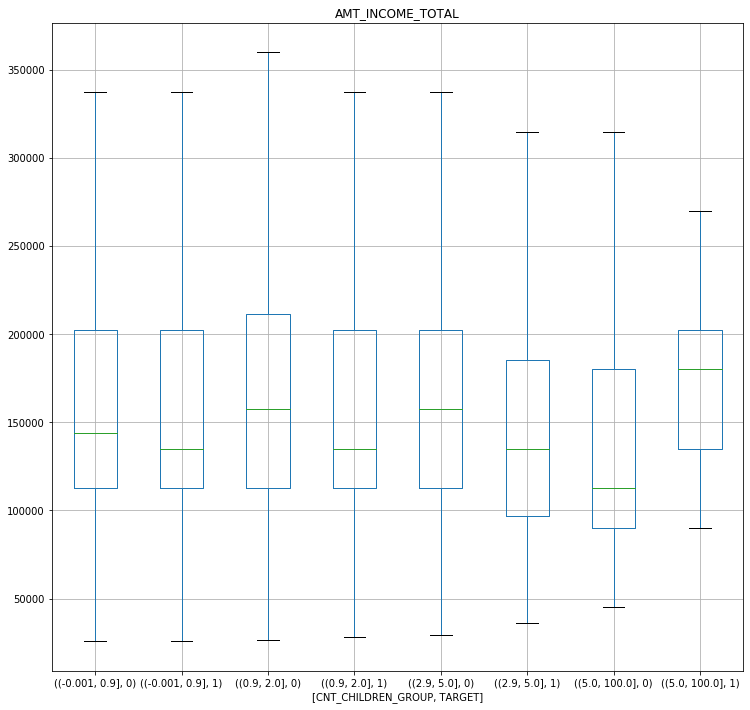

In [75]:
#2-2
"""
Your code here
"""
plt_column = ["AMT_INCOME_TOTAL"]
plt_by = ["CNT_CHILDREN_GROUP", "TARGET"]

app_train.boxplot(column=plt_column, by = plt_by, showfliers = False, figsize=(12,12))
plt.suptitle('')
plt.show()

In [77]:
#3
"""
Your code here
"""
app_train['AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET'] = grouped_df.apply(lambda x: (x - np.mean(x)) / (np.std(x)))

app_train[['AMT_INCOME_TOTAL','AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET']].head()

,AMT_INCOME_TOTAL,AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET
0,202500.0,0.491536
1,270000.0,0.972437
2,67500.0,-0.934708
3,135000.0,-0.298993
4,121500.0,-0.426136
